In [1]:
# Created on jan 2025
# https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1012692

# numpy and scipy
import numpy as np
import scipy.stats as stt
import scipy.linalg as spl
import scipy.signal as spsg
import scipy.io as sio


# MOU model
from test_MOU_largenet import MOUv2

# classification scikit-learn
import sklearn.linear_model as skllm
import sklearn.preprocessing as skppr
import sklearn.pipeline as skppl
import sklearn.neighbors as sklnn

# plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
import pandas as pd

#saving results
import os


# 2x2 Toy Model Analytical Solutions

Study Relation btw B parameters and Entropy Production (NB. I this case X^(-1) = Q)

Matrix B = (1 b)(c 1) Matrix D = 1 -> Entropy Production Phi = (b - c)^2/2

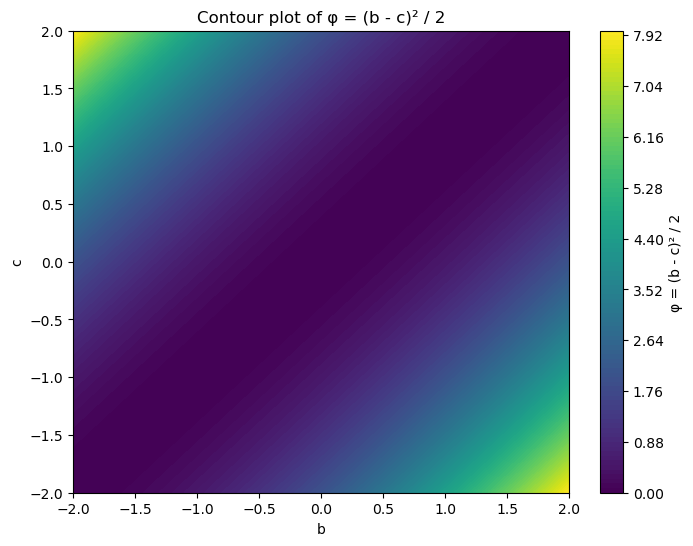

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges for b and c
b_vals = np.linspace(-2.0, 2.0, 200)
c_vals = np.linspace(-2.0, 2.0, 200)

# Create a meshgrid
B, C = np.meshgrid(b_vals, c_vals)

# Compute phi = (b - c)^2 / 2
phi = (B - C)**2 / 2

# Plot the result
plt.figure(figsize=(8, 6))
contour = plt.contourf(B, C, phi, levels=100, cmap='viridis')
cbar = plt.colorbar(contour)
cbar.set_label('φ = (b - c)² / 2')

plt.xlabel('b')
plt.ylabel('c')
plt.title('Contour plot of φ = (b - c)² / 2')
plt.grid(False)
plt.show()


Matrix B = (1 b)(c 1), Matrix D = (u 0)(0 v)

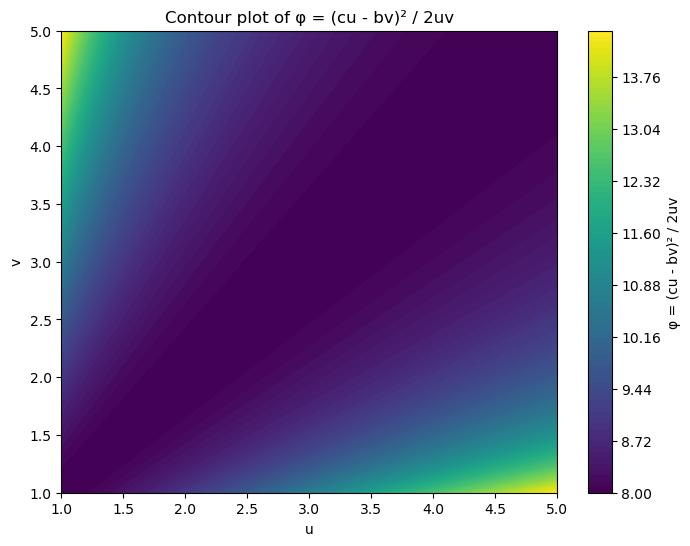

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Fix b and c in range as the values that give the maximal entropy production: 
# so the values that maximize the difference btw b and c
# in our specific case: [0.4, 0.0] or [0.0, 0.4] it gives the same result. 
b = 2.0
c = -2.0

# Define ranges for u and v
u_vals = np.linspace(1, 5, 100)
v_vals = np.linspace(1, 5, 100)

# Create a meshgrid
U, V = np.meshgrid(u_vals, v_vals)

# Compute phi = (b - c)^2 / 2
phi = (c*U - b*V)**2 / (2*U*V)

# Plot the result
plt.figure(figsize=(8, 6))
contour = plt.contourf(U, V, phi, levels=100, cmap='viridis')
cbar = plt.colorbar(contour)
cbar.set_label('φ = (cu - bv)² / 2uv')

plt.xlabel('u')
plt.ylabel('v')
plt.title('Contour plot of φ = (cu - bv)² / 2uv')
plt.grid(False)
plt.show()

# 2x2 Toy Model Numerical Solutions

Numerically solve the Lyapunov equation: 

*Kronecker Numerical Method*: 

1. try to see if the solution og 2x2 gives something reliable with respect to the analitical solution one.

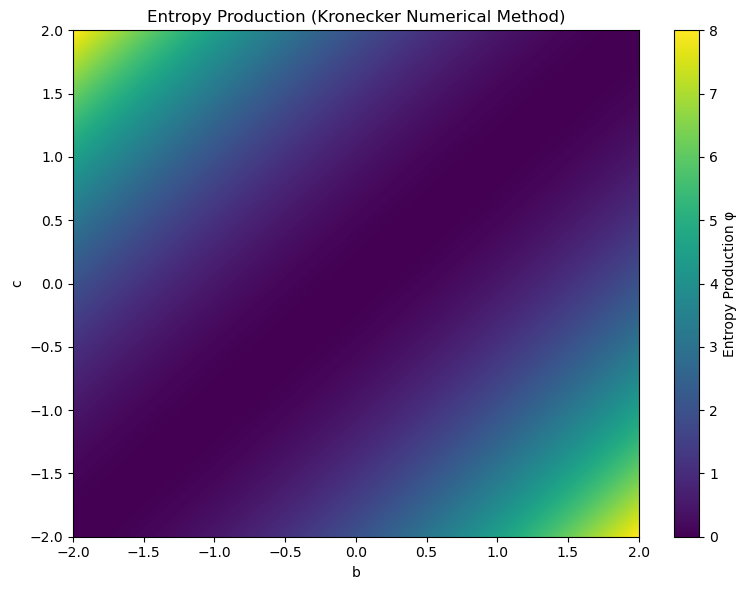

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione stabile via prodotto di Kronecker
def entropy_production_kron(b, c):
    B = np.array([[1, b],
                  [c, 1]])
    D = np.eye(2)
    n = B.shape[0]

    # Risolvi BS + SB^T = 2D con il metodo dei prodotti di Kronecker
    I = np.eye(n)
    A = np.kron(B, I) + np.kron(I, B)
    vec_rhs = 2 * D.flatten()
    vec_S = np.linalg.solve(A, vec_rhs)
    S = vec_S.reshape(n, n)

    # Calcola Q = 1/2 (BS - SB^T)
    Q = 0.5 * (B @ S - S @ B.T)

    # Produzione di entropia: φ = -tr(B Q) (dato che D = I)
    phi = -np.trace(B @ Q)

    # Clip di sicurezza per numeri negativi piccoli
    return max(phi, 0)

# Definisci griglia di valori (b, c)
b_vals = np.linspace(-2.0, 2.0, 200)
c_vals = np.linspace(-2.0, 2.0, 200)
entropy_grid = np.zeros((len(c_vals), len(b_vals)))

# Calcola la griglia numerica
for i, c in enumerate(c_vals):
    for j, b in enumerate(b_vals):
        entropy_grid[i, j] = entropy_production_kron(b, c)

# Plot della heatmap
plt.figure(figsize=(8, 6))
im = plt.imshow(entropy_grid, origin="lower", aspect="auto", cmap="viridis",
                extent=[-2, 2, -2, 2])
plt.title("Entropy Production (Kronecker Numerical Method)")
plt.xlabel("b")
plt.ylabel("c")
plt.colorbar(im, label="Entropy Production φ")
plt.tight_layout()
plt.show()


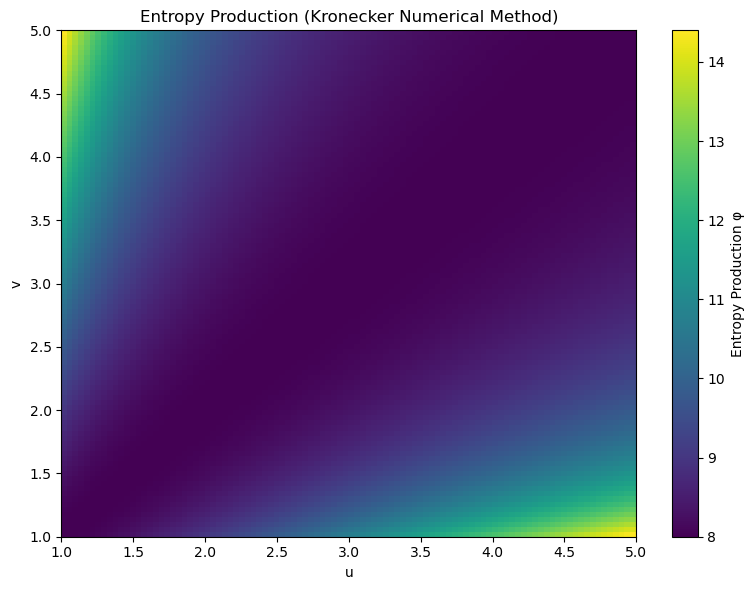

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione stabile via prodotto di Kronecker
def entropy_production_kron(u, v):
    B = np.array([[1, 2],
                  [-2, 1]])
    D = np.array([[u, 0],
                  [0, v]])
    n = B.shape[0]

    # Risolvi BS + SB^T = 2D con il metodo dei prodotti di Kronecker
    I = np.eye(n)
    A = np.kron(B, I) + np.kron(I, B)
    vec_rhs = 2 * D.flatten()
    vec_S = np.linalg.solve(A, vec_rhs)
    S = vec_S.reshape(n, n)

    # Calcola Q = 1/2 (BS - SB^T)
    Q = 0.5 * (B @ S - S @ B.T)

    # Produzione di entropia: φ = -tr(B Q) (dato che D = I)
    phi = -np.trace(np.linalg.inv(D) @ B @ Q)

    # Clip di sicurezza per numeri negativi piccoli
    return max(phi, 0)

# Definisci griglia di valori (b, c)
u_vals = np.linspace(1, 5, 100)
v_vals = np.linspace(1, 5, 100)
entropy_grid = np.zeros((len(u_vals), len(v_vals)))

# Calcola la griglia numerica
for i, u in enumerate(u_vals):
    for j, v in enumerate(v_vals):
        entropy_grid[i, j] = entropy_production_kron(u, v)

# Plot della heatmap
plt.figure(figsize=(8, 6))
im = plt.imshow(entropy_grid, origin="lower", aspect="auto", cmap="viridis",
                extent=[1, 5, 1, 5])
plt.title("Entropy Production (Kronecker Numerical Method)")
plt.xlabel("u")
plt.ylabel("v")
plt.colorbar(im, label="Entropy Production φ")
plt.tight_layout()
plt.show()


# 3x3 Toy model

Disclaimer: 

B has positive eingenvalues

D is positive definite

-> I need to solve a Sylvester equation, the suggested Numerical Method is the Kronecker one <-

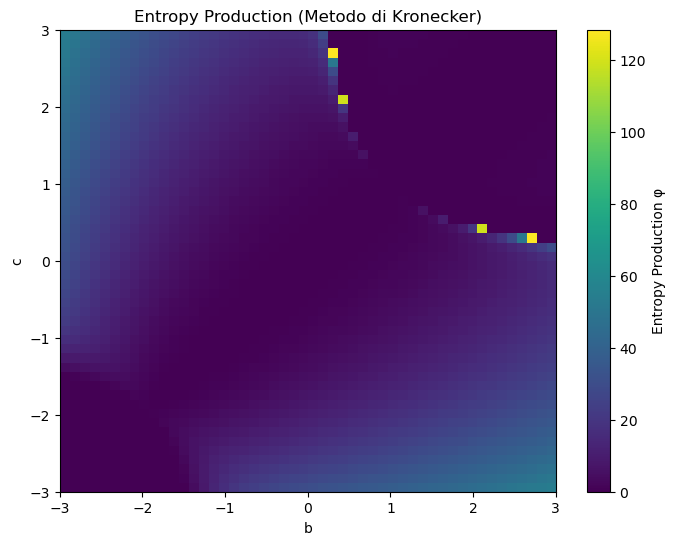

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione con metodo di Kronecker
def entropy_production_kron(B):
    D = np.eye(3)
    n = B.shape[0]
    I = np.eye(n)
    A = np.kron(B, I) + np.kron(I, B)
    vec_rhs = 2 * D.flatten()
    vec_S = np.linalg.solve(A, vec_rhs)
    S = vec_S.reshape(n, n)
    Q = 0.5 * (B @ S - S @ B.T)
    phi = -np.trace(B @ Q)
    return max(phi, 0)

# Griglia dei parametri
b_vals = np.linspace(-3, 3, 50)
c_vals = np.linspace(-3, 3, 50)

entropy_kron = np.zeros((len(b_vals), len(c_vals)))

for i, b in enumerate(b_vals):
    for j, c in enumerate(c_vals):
        B_matrix = np.array([[1, b, b],
                             [c, 1, b],
                             [c, c, 1]])
        entropy_kron[i, j] = entropy_production_kron(B_matrix)

# Heat map metodo di Kronecker
plt.figure(figsize=(8, 6))
plt.imshow(entropy_kron, origin="lower", aspect="auto", extent=[-3,3,-3,3], cmap='viridis')
plt.title("Entropy Production (Metodo di Kronecker)")
plt.xlabel("b")
plt.ylabel("c")
plt.colorbar(label="Entropy Production φ")
plt.show()


2. try to implement it for higher dimensions (3x3) -> Sospicious values of Entropy

⚠️  φ = 84.20 per b = 2.00, c = 0.46
⚠️  φ = 184.62 per b = 1.88, c = 0.51
⚠️  φ = 149.23 per b = 1.76, c = 0.55
⚠️  φ = 106.65 per b = 1.56, c = 0.63
⚠️  φ = 101.50 per b = 1.39, c = 0.71
⚠️  φ = 101.50 per b = 0.71, c = 1.39
⚠️  φ = 106.65 per b = 0.63, c = 1.56
⚠️  φ = 149.23 per b = 0.55, c = 1.76
⚠️  φ = 184.62 per b = 0.51, c = 1.88
⚠️  φ = 84.20 per b = 0.46, c = 2.00


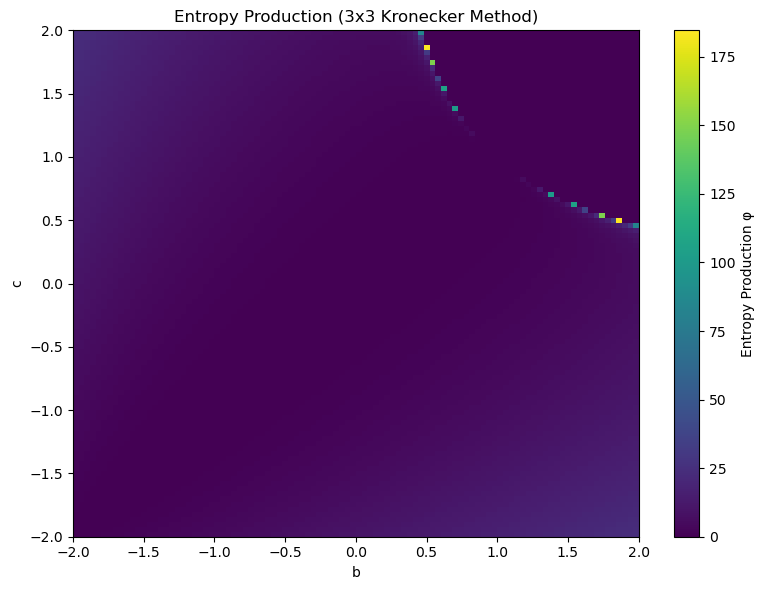

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione generale per entropia con B, D 3x3
def entropy_production_kron_general(B, D):
    n = B.shape[0]
    assert B.shape == (n, n)
    assert D.shape == (n, n)

    # Inverso di D
    D_inv = np.linalg.inv(D)

    # Risolvi Lyapunov con Kronecker
    I = np.eye(n)
    A = np.kron(B, I) + np.kron(I, B)
    vec_rhs = 2 * D.flatten()
    vec_S = np.linalg.pinv(A) @ vec_rhs
    S = vec_S.reshape(n, n)

    # Q = 1/2 (BS - SB^T)
    Q = 0.5 * (B @ S - S @ B.T)

    # φ = -tr(D⁻¹ B Q)
    phi = -np.trace(D_inv @ B @ Q)

    return max(phi, 0)

# Esempio: B parametrico con b, c
def build_B(b, c):
    return np.array([[1, b, b],
                     [c, 1, b],
                     [c, c, 1]])

# Esempio: D identità
D = np.eye(3)

# Griglia di valori b e c
b_vals = np.linspace(-2, 2, 100)
c_vals = np.linspace(-2, 2, 100)
entropy_grid = np.zeros((len(c_vals), len(b_vals)))

# Calcolo griglia con logging per φ grandi
for i, c in enumerate(c_vals):
    for j, b in enumerate(b_vals):
        B = build_B(b, c)
        phi = entropy_production_kron_general(B, D)

        # Logga se φ è troppo alto
        if phi > 50:
            print(f"⚠️  φ = {phi:.2f} per b = {b:.2f}, c = {c:.2f}")

        entropy_grid[i, j] = phi

# Plot heatmap
plt.figure(figsize=(8, 6))
im = plt.imshow(entropy_grid, origin="lower", aspect="auto", cmap="viridis",
                extent=[-2, 2, -2, 2])
plt.title("Entropy Production (3x3 Kronecker Method)")
plt.xlabel("b")
plt.ylabel("c")
plt.colorbar(im, label="Entropy Production φ")
plt.tight_layout()
plt.show()


⚠️  φ sospetto: 84.20 per b = 2.00, c = 0.46
⚠️  φ sospetto: 184.62 per b = 1.88, c = 0.51
⚠️  φ sospetto: 149.23 per b = 1.76, c = 0.55
⚠️  φ sospetto: 106.65 per b = 1.56, c = 0.63
⚠️  φ sospetto: 101.50 per b = 1.39, c = 0.71
⚠️  φ sospetto: 101.50 per b = 0.71, c = 1.39
⚠️  φ sospetto: 106.65 per b = 0.63, c = 1.56
⚠️  φ sospetto: 149.23 per b = 0.55, c = 1.76
⚠️  φ sospetto: 184.62 per b = 0.51, c = 1.88
⚠️  φ sospetto: 84.20 per b = 0.46, c = 2.00


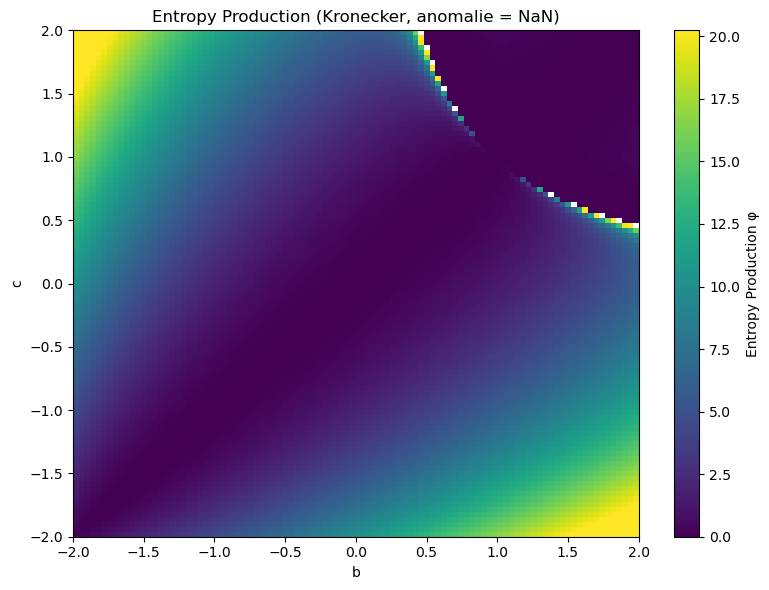

In [7]:
# Ricreo la funzione che mancava nel contesto

def entropy_production_kron_general(B, D):
    n = B.shape[0]
    assert B.shape == (n, n)
    assert D.shape == (n, n)

    D_inv = np.linalg.inv(D)
    I = np.eye(n)
    A = np.kron(B, I) + np.kron(I, B)
    vec_rhs = 2 * D.flatten()
    vec_S = np.linalg.pinv(A) @ vec_rhs
    S = vec_S.reshape(n, n)
    Q = 0.5 * (B @ S - S @ B.T)
    phi = -np.trace(D_inv @ B @ Q)
    return max(phi, 0)

# Ricreo build_B e i parametri se mancanti
def build_B(b, c):
    return np.array([[1, b, b],
                     [c, 1, b],
                     [c, c, 1]])

D = np.eye(3)
b_vals = np.linspace(-2, 2, 100)
c_vals = np.linspace(-2, 2, 100)
threshold = 50

# Griglia vuota
entropy_grid_nan = np.zeros((len(c_vals), len(b_vals)))

# Calcolo griglia con NaN per anomalie
for i, c in enumerate(c_vals):
    for j, b in enumerate(b_vals):
        B = build_B(b, c)
        phi = entropy_production_kron_general(B, D)

        if phi > threshold:
            print(f"⚠️  φ sospetto: {phi:.2f} per b = {b:.2f}, c = {c:.2f}")
            phi = np.nan  # Anomalia → NaN

        entropy_grid_nan[i, j] = phi

# Heatmap con NaN visibili (spazi bianchi nella colormap)
plt.figure(figsize=(8, 6))
im = plt.imshow(entropy_grid_nan, origin="lower", aspect="auto", cmap="viridis",
                extent=[-2, 2, -2, 2], vmin=0,
                vmax=np.nanpercentile(entropy_grid_nan, 99))  # esclude NaN dal percentile
plt.title("Entropy Production (Kronecker, anomalie = NaN)")
plt.xlabel("b")
plt.ylabel("c")
plt.colorbar(im, label="Entropy Production φ")
plt.tight_layout()
plt.show()
